In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
trainPd = pd.read_csv("Downloads/all/train.csv")
testPd = pd.read_csv("Downloads/all/test.csv")
genderSubmissionPd = pd.read_csv("Downloads/all/gender_submission.csv")

In [22]:
unique = pd.DataFrame()
unique['rows'] = pd.Series(trainPd.columns)
unique = trainPd.apply(pd.Series.nunique).reset_index()
unique = unique.rename(columns={"rows":"rows", 0:"count"})
unique["value"] = unique.apply(lambda x: trainPd[x.rows].drop_duplicates().tolist() if(x["count"]<5)  else "", axis=1)

In [129]:
x = trainPd.groupby(["Pclass","Survived"]).agg({"Survived":'count'})
x.rename(columns={"Survived":"countS"},inplace=True)
x.reset_index(inplace=True)
x["persurvivel"] = x.apply(lambda y: y.countS/sum(x[x.Pclass==y.Pclass]["countS"]),axis=1)

In [130]:
x

,Pclass,Survived,countS,persurvivel
0,1,0,80,0.370370
1,1,1,136,0.629630
2,2,0,97,0.527174
3,2,1,87,0.472826
4,3,0,372,0.757637
5,3,1,119,0.242363


In [142]:
embarked = {"C":0.44, "Q":0.61, "S":0.66} 
sex = {"female":0.25, "male": 0.81}
pclass = {1:0.37, 2:0.52, 3:0.75}
age = {5:0.25}

In [152]:
trainPd['result'] = trainPd.apply(lambda x : 
            (embarked.get(x['Embarked'],0.5))*(sex.get(x['Sex'],0.5))*(pclass.get(x['Pclass'],0.5))*(0.25 if x['Age']<=5  else 0.5) ,axis=1)

In [153]:
trainPd['result'] = trainPd['result'].apply(lambda x : 1 if x<0.15 else 0)

In [154]:
trainPd[trainPd.Survived!=trainPd.result].shape

(323, 13)

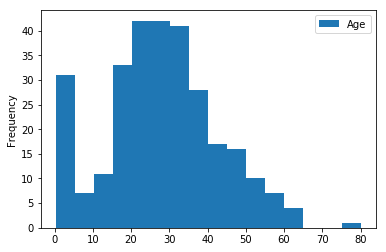

In [132]:
trainPd[(trainPd.Survived==1)&(trainPd.Age>0)][["Age"]].plot(kind="hist", bins= 16)

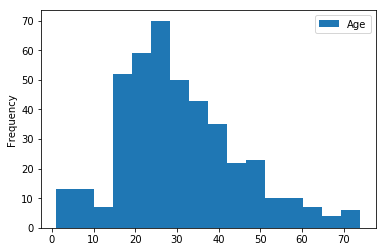

In [133]:
trainPd[(trainPd.Survived==0)&(trainPd.Age>0)][["Age"]].plot(kind="hist", bins= 16)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


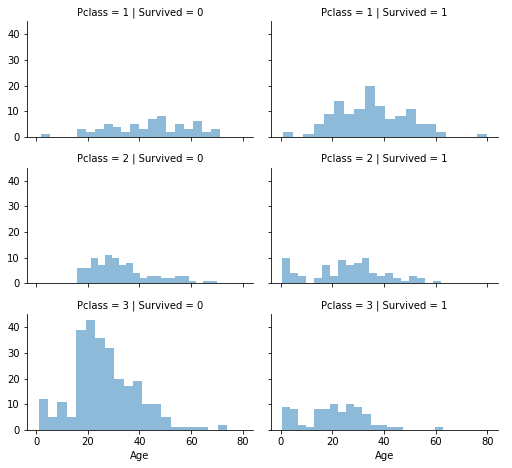

In [162]:
grid = sns.FacetGrid(trainPd, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

In [ ]:
trainPd